![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
!pip install livelossplot

     |████████████████████████████████| 793 kB 39.7 MB/s 
     |████████████████████████████████| 381 kB 58.1 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from livelossplot import PlotLossesKeras
from keras import backend as K
from keras import initializers, optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


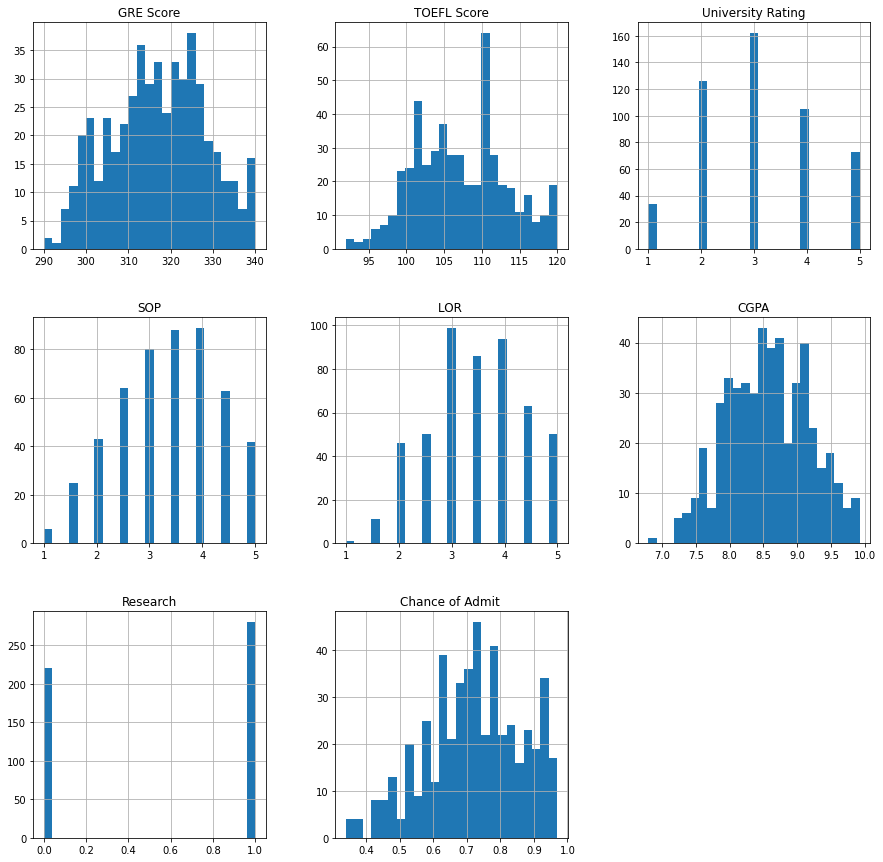

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [3]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [4]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

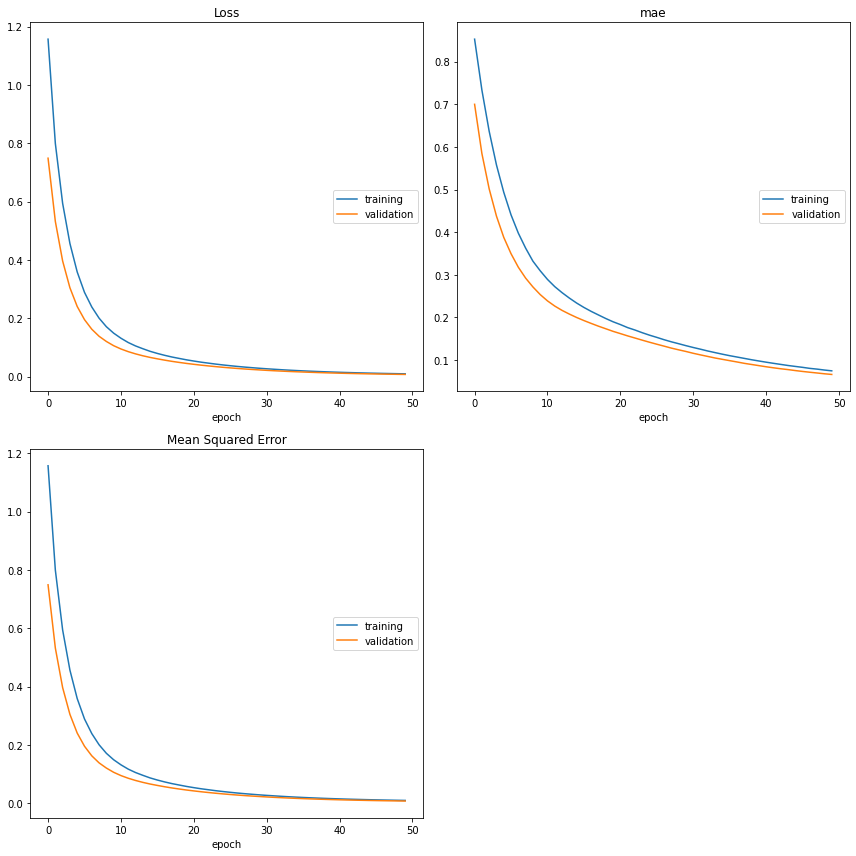

Loss
	training         	 (min:    0.009, max:    1.157, cur:    0.009)
	validation       	 (min:    0.007, max:    0.749, cur:    0.007)
mae
	training         	 (min:    0.075, max:    0.853, cur:    0.075)
	validation       	 (min:    0.066, max:    0.700, cur:    0.066)
Mean Squared Error
	training         	 (min:    0.009, max:    1.157, cur:    0.009)
	validation       	 (min:    0.007, max:    0.749, cur:    0.007)
11/11 [==============================] - 1s 52ms/step - loss: 0.0095 - mae: 0.0748 - mse: 0.0095 - val_loss: 0.0074 - val_mae: 0.0663 - val_mse: 0.0074
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None
7 input v

In [18]:
# Celda 1
# Normalización de variables predictoras (X) con la función StandardScaler
# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(xTrain)

# Transformación de los set de entrenamiento y test
x_Train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
x_Test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

x_Train = np.array(x_Train)
y_Train = np.array(yTrain)

x_Test = np.array(x_Test)
y_Test = np.array(yTest)

# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
# Definición de dimensiones de salida, varaibles de interés
output_var = pd.DataFrame(y_Train).shape[1]

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['mae', 'mse'])

# Entrenamiento de la red neuronal con 50 épocas
punto1 = model.fit(x_Train, y_Train, 
          verbose=1, 
          epochs=50, 
          validation_data=(x_Test, y_Test),
          callbacks=[PlotLossesKeras()])

# Impresión de la arquitectura de la red neuronal
print(model.summary())
print(dims, 'input variables')
print(output_var, ' output variables')
print('MAE',punto1.history['mae'][-1])
print('val_MAE',punto1.history['val_mae'][-1])
print('MSE',punto1.history['mse'][-1])
print('val_MSE',punto1.history['val_mse'][-1])

El problema a resolver es una regresión por lo que se utilizan los siguientes parámetros:

Función de pérdida: teniendo en cuenta que el conjunto de datos del problema no presenta datos atípicos no se utiliza la función MAE que es robusta para valores atípicos pero tiene el problema de que el gradiente actualizado es siempre el mismo, es decir, incluso para un valor de pérdida pequeño, el gradiente también es grande. Esto no favorece el aprendizaje de modelos, por lo tanto se decide utilizar MSE que aunque puede ser afectado por los valores atípicos no es un problema en este caso y puede converger efectivamente incluso con una tasa de aprendizaje fija. El gradiente de pérdida de MSE aumenta a medida que aumenta la pérdida y disminuye cuando la pérdida tiende a cero.

Optimizador: se verifican sgd, adam, RMSprop, Adadelta y Adagrad encontrando que para una capa sgd presenta los mejores resultados y para multicapa adam dio los mejores resultados, lo cual se debería a que adam se desempeña bien con escasos datos como los del problema y a que se utlizó sgd con los parametros por default sin calibrar. En el caso de la librería utilizada, Keras, utiliza sgd con momentum que acelera en direcciones de descenso constante ayudando al modelo a escapar de las mesetas y lo hace menos susceptible a quedarse atascado en los mínimos locales porlo que en este caso es el mejor para el modelo unicapa.

Número de épocas: en el modelo se realizaron 50 épocas pero se evidencia que, con MSE como función de perdida y con sgd como optimizador, a partir de 20 épocas la disminución del error no es representativa.

Los resultados obtenidos fueron:

MAE 0.07478201389312744

val_MAE 0.0663292333483696

MSE 0.009485604241490364

val_MSE 0.007401391863822937



## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

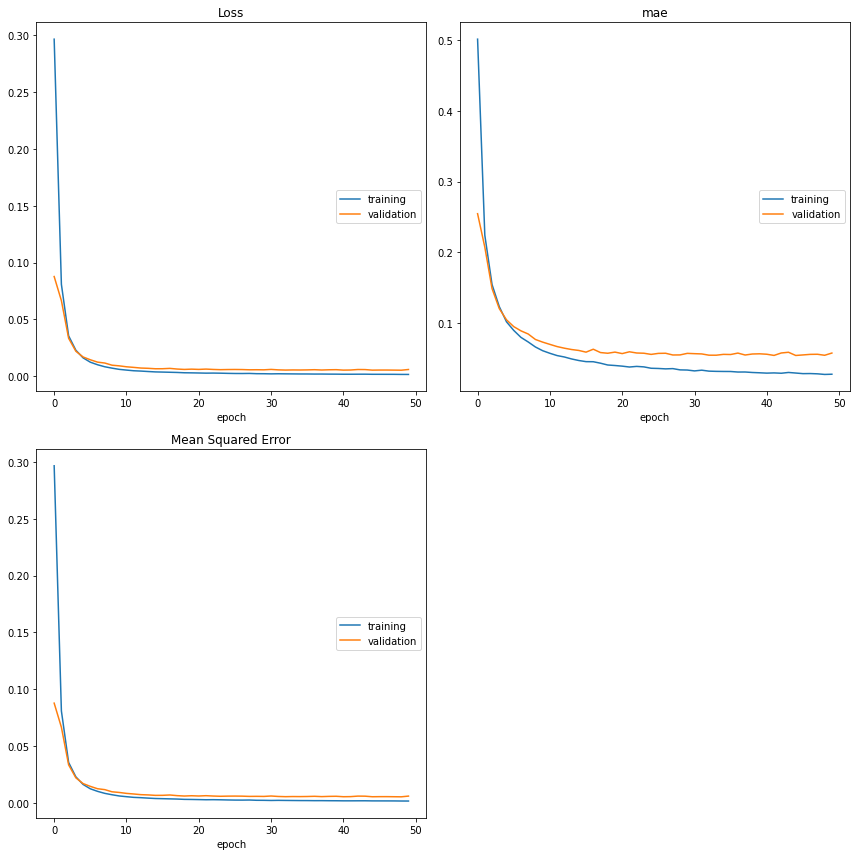

Loss
	training         	 (min:    0.001, max:    0.297, cur:    0.001)
	validation       	 (min:    0.005, max:    0.088, cur:    0.006)
mae
	training         	 (min:    0.027, max:    0.502, cur:    0.027)
	validation       	 (min:    0.054, max:    0.255, cur:    0.057)
Mean Squared Error
	training         	 (min:    0.001, max:    0.297, cur:    0.001)
	validation       	 (min:    0.005, max:    0.088, cur:    0.006)
11/11 [==============================] - 1s 54ms/step - loss: 0.0015 - mae: 0.0274 - mse: 0.0015 - val_loss: 0.0058 - val_mae: 0.0574 - val_mse: 0.0058
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2

In [23]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(100, input_shape=(dims,),activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae', 'mse'])

# Entrenamiento de la red neuronal con 50 épocas
punto2 = model.fit(x_Train, y_Train, 
          verbose=1, 
          epochs=50, 
          validation_data=(x_Test, y_Test),
          callbacks=[PlotLossesKeras()])

# Impresión de la arquitectura de la red neuronal
print(model.summary())
print('MAE',punto2.history['mae'][-1])
print('val_MAE',punto2.history['val_mae'][-1])
print('MSE',punto2.history['mse'][-1])
print('val_MSE',punto2.history['val_mse'][-1])

El problema a resolver es una regresión por lo que se utilizan los siguientes parámetros:

Función de pérdida: teniendo en cuenta que el conjunto de datos del problema no presenta datos atípicos no se utiliza la función MAE que es robusta para valores atípicos pero tiene el problema de que el gradiente actualizado es siempre el mismo, es decir, incluso para un valor de pérdida pequeño, el gradiente también es grande. Esto no favorece el aprendizaje de modelos, por lo tanto se decide utilizar MSE que aunque puede ser afectado por los valores atípicos no es un problema en este caso y puede converger efectivamente incluso con una tasa de aprendizaje fija. El gradiente de pérdida de MSE aumenta a medida que aumenta la pérdida y disminuye cuando la pérdida tiende a cero.

Optimizador: se verifican sgd, adam, RMSprop, Adadelta y Adagrad encontrando que para una capa sgd presenta los mejores resultados y para multicapa adam dio los mejores resultados, lo cual se debería a que adam se desempeña bien con escasos datos como los del problema y a que se utlizó sgd con los parametros por default sin calibrar.

Número de épocas: en el modelo se realizaron 50 épocas pero se evidencia que, con MSE como función de perdida y con adam como optimizador, a partir de 10 épocas la disminución del error no es representativa.

Número de neuronas: en el modelo se utilizaron 7, 30, 60, 100 y 250 encontrando que la mejora fue progresiva, pero a partir de 100 neuronas no era representativa la dismnución del error, porlo que se presenta el modelo con 100 neuronas.

Los resultados obtenidos fueron:

MAE 0.027418572455644608

val_MAE 0.05738566070795059

MSE 0.0014994533266872168

val_MSE 0.005842685699462891



## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

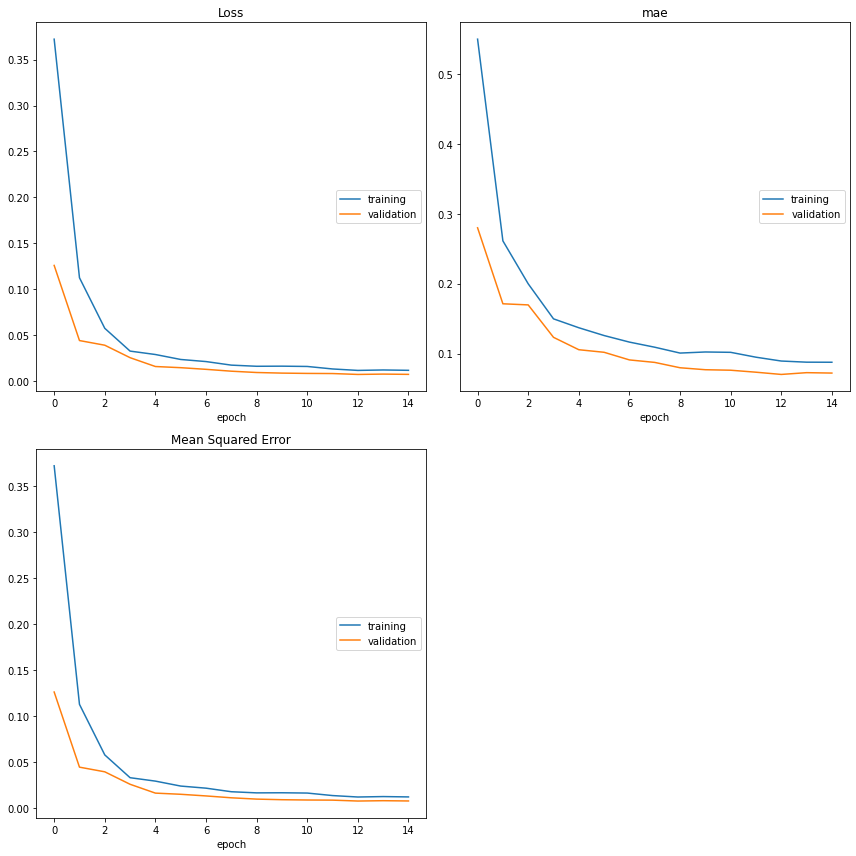

Loss
	training         	 (min:    0.012, max:    0.372, cur:    0.012)
	validation       	 (min:    0.008, max:    0.126, cur:    0.008)
mae
	training         	 (min:    0.088, max:    0.550, cur:    0.088)
	validation       	 (min:    0.070, max:    0.280, cur:    0.072)
Mean Squared Error
	training         	 (min:    0.012, max:    0.372, cur:    0.012)
	validation       	 (min:    0.008, max:    0.126, cur:    0.008)
11/11 [==============================] - 1s 81ms/step - loss: 0.0120 - mae: 0.0877 - mse: 0.0120 - val_loss: 0.0076 - val_mae: 0.0722 - val_mse: 0.0076
Epoch 15: early stopping
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                 

In [26]:
# Celda 3
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(100, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae', 'mse'])

# Entrenamiento de la red neuronal con 50 épocas
punto3 = model.fit(x_Train, y_Train, 
          verbose=1, 
          epochs=50, 
          validation_data=(x_Test, y_Test),
          callbacks=[PlotLossesKeras(), best_model, early_stop])

# Impresión de la arquitectura de la red neuronal
print(model.summary())
print('MAE',punto3.history['mae'][-1])
print('val_MAE',punto3.history['val_mae'][-1])
print('MSE',punto3.history['mse'][-1])
print('val_MSE',punto3.history['val_mse'][-1])

El problema a resolver es una regresión por lo que se utilizan los siguientes parámetros:

Función de pérdida: teniendo en cuenta que el conjunto de datos del problema no presenta datos atípicos no se utiliza la función MAE que es robusta para valores atípicos pero tiene el problema de que el gradiente actualizado es siempre el mismo, es decir, incluso para un valor de pérdida pequeño, el gradiente también es grande. Esto no favorece el aprendizaje de modelos, por lo tanto se decide utilizar MSE que aunque puede ser afectado por los valores atípicos no es un problema en este caso y puede converger efectivamente incluso con una tasa de aprendizaje fija. El gradiente de pérdida de MSE aumenta a medida que aumenta la pérdida y disminuye cuando la pérdida tiende a cero.

Optimizador: se verifican sgd, adam, RMSprop, Adadelta y Adagrad encontrando que para una capa sgd presenta los mejores resultados y para multicapa adam dio los mejores resultados, lo cual se debería a que adam se desempeña bien con escasos datos como los del problema y a que se utlizó sgd con los parametros por default sin calibrar.

Número de épocas: en el modelo se realizaron 50 épocas pero el early stop paró el modelo en la época 15.

Número de neuronas: en el modelo se utilizaron 7, 30, 60, 100 y 250 encontrando que la mejora fue progresiva, pero a partir de 100 neuronas no era representativa la dismnución del error, porlo que se presenta el modelo con 100 neuronas.

Al aplicar un dropout de 0.2 se evidnecia en las gráficas que el modelo presenta separación entre las lineas de entrenamiento y validación por lo que se puede inferir un menor sobre ajuste del modelo a los datos de entrenamiento.

Los resultados obtenidos fueron:

MAE 0.08766655623912811

val_MAE 0.07219315320253372

MSE 0.011984999291598797

val_MSE 0.007585402112454176

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

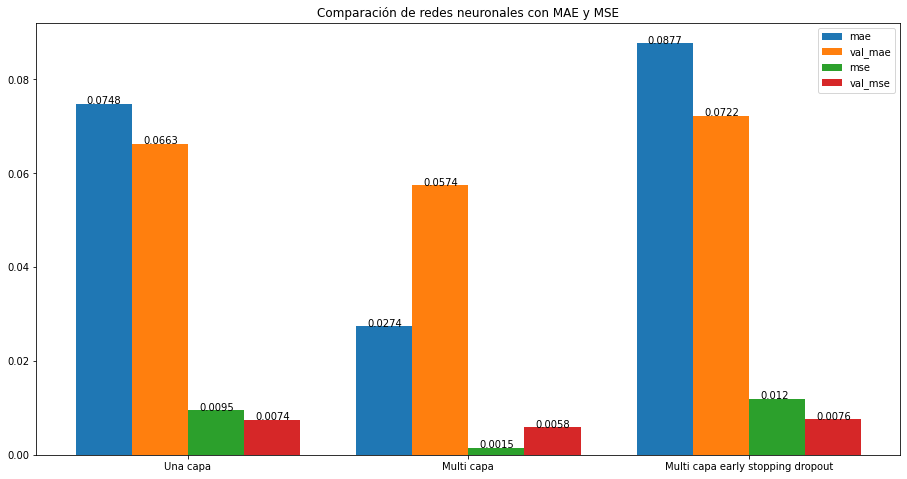

In [27]:
# Celda 4
# Gráfica de los Accuracy de los modelos utilizados
nombre = ['Una capa', 'Multi capa', 'Multi capa early stopping dropout']
mae = [punto1.history['mae'][-1], punto2.history['mae'][-1], punto3.history['mae'][-1]]
val_mae = [punto1.history['val_mae'][-1], punto2.history['val_mae'][-1], punto3.history['val_mae'][-1]]
mse = [punto1.history['mse'][-1], punto2.history['mse'][-1], punto3.history['mse'][-1]]
val_mse = [punto1.history['val_mse'][-1], punto2.history['val_mse'][-1], punto3.history['val_mse'][-1]]
x_axis = np.arange(len(nombre))
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de redes neuronales con MAE y MSE")
ax.bar(x_axis -0.3, mae, width=0.2, label = 'mae')
ax.bar(x_axis -0.1, val_mae, width=0.2, label = 'val_mae')
ax.bar(x_axis +0.1, mse, width=0.2, label = 'mse')
ax.bar(x_axis +0.3, val_mse, width=0.2, label = 'val_mse')
ax.legend()
def addlabels(x,y,plotP):
  for i in range(len(x)):
    for j in range(len(y)):
      posx = [-0.3, -0.1, 0.1, 0.3]
      plotP.text(i+posx[j]-0.06,round(y[j][i],4),round(y[j][i],4))
addlabels(nombre,[mae,val_mae,mse,val_mse],plt)
plt.xticks(x_axis, nombre)
plt.show()

El modelo que presentó los mejores resultados en las métricas fue el multi capa, ya que tiene los menores errores de MSE y de MAE pero se evidencia un sobreajuste en el que los resultados de las metricas de entrenamiento son duplicadas por las metricas de validación.

El peor error se presenta en el modelo multi capa con early stopping y dropuot aunque no se genera el sobre ajuste del modelo anterior debido al dropout y el número de épocas es menor por el early stopping lo que lo hace menos pesado computacionalmente.

El modelo con una capa presente un resultado intermedio entre los modelos vistos, no evidencia sobreajuste y computacionalmente es menos intenso por su reducido número de neuronas.